# Vibrato Monte Carlo & Automatic differentiation

The aim of this notebook is to be able to plot all the relevant figures for tests and for the paper

In [1]:
%reset -f
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def savefig(filename):
    plt.savefig('{}.pdf'.format(filename))

In [3]:
# Figures configuration
width = 13
height = width / 1.618

preamble = r"\usepackage[utf8x]{inputenc}, \usepackage[T1]{fontenc}"
plt.rc('pgf', texsystem='pdflatex', preamble=preamble)
plt.rc('figure', figsize=[width, height], autolayout=True)
plt.rc('font', size=13, family='Serif')
plt.rc('text', usetex=True)
plt.rc('lines', linewidth=1.2)
plt.rc('axes.spines', top=False, right=False)
plt.rc('axes', labelsize=14, grid=False, titlesize=16, titlepad=22)
plt.rc('axes3d', grid=False)
plt.rc('xtick', direction='in', labelsize=14)
plt.rc('ytick', direction='in', labelsize=14)
plt.rc('xtick.minor', visible=True, size=4)
plt.rc('ytick.minor', visible=True, size=4)
plt.rc('xtick.major', size=7.5)
plt.rc('ytick.major', size=7.5)


## Vanilla Option BlackScholes

### Premium tests

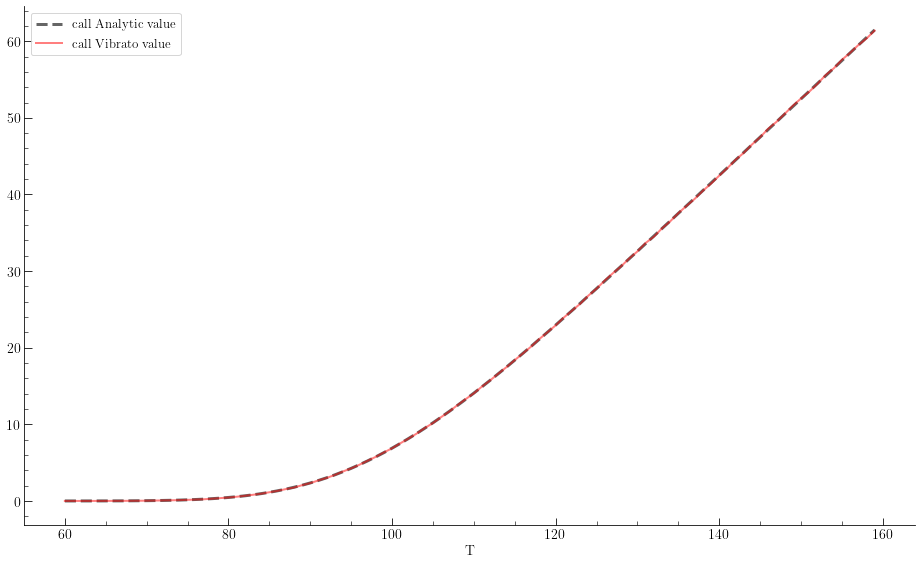

In [26]:
call_vanilla_premium_analytic = pd.read_csv('datasets/call_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
call_vanilla_premium_vibrato = pd.read_csv('datasets/call_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_vanilla_premium_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_premium_vibrato.plot(ax=ax, color='red', lw=2, alpha=.5);

### Delta tests

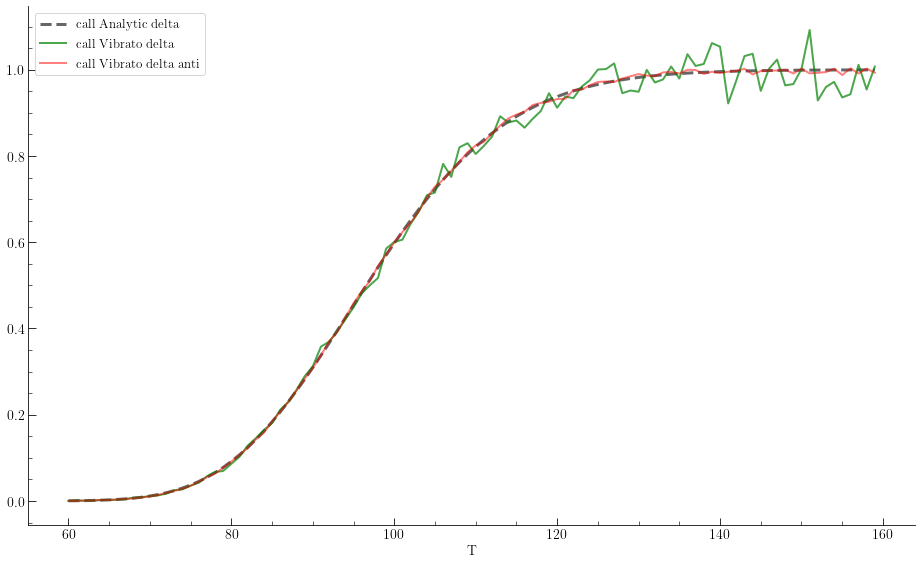

In [111]:
call_vanilla_delta_analytic = pd.read_csv('datasets/call_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato = pd.read_csv('datasets/call_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
call_vanilla_delta_vibrato_anti = pd.read_csv('datasets/call_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_delta_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_delta_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_delta_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Vega tests

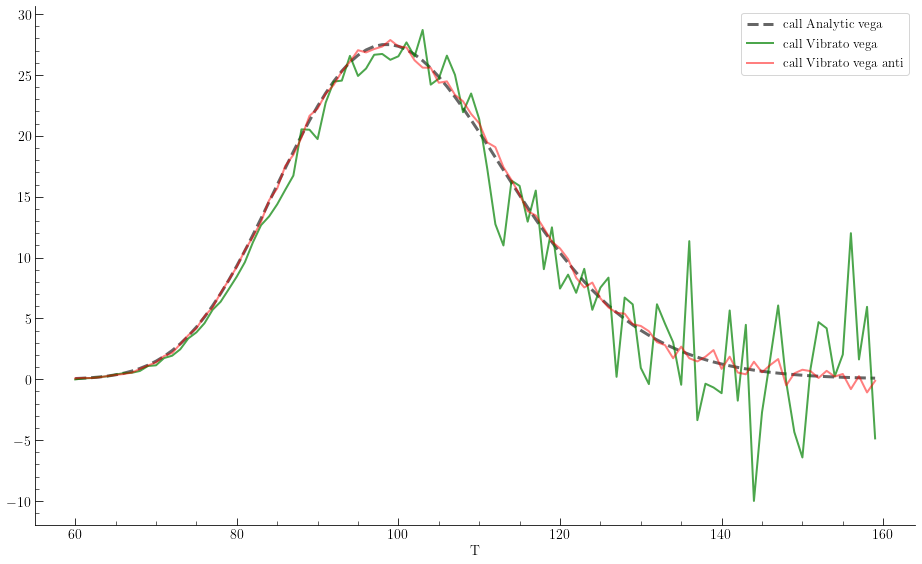

In [110]:
call_vanilla_vega_analytic = pd.read_csv('datasets/call_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato = pd.read_csv('datasets/call_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
call_vanilla_vega_vibrato_anti = pd.read_csv('datasets/call_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vega_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_vega_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_vega_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Rho tests

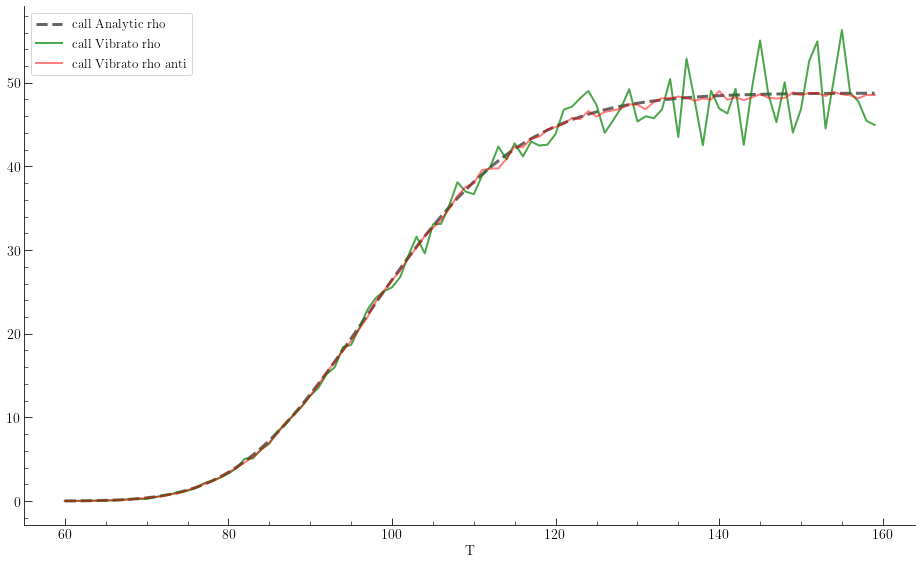

In [90]:
call_vanilla_rho_analytic = pd.read_csv('datasets/call_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato = pd.read_csv('datasets/call_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
call_vanilla_rho_vibrato_anti = pd.read_csv('datasets/call_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_rho_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_rho_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_rho_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Gamma

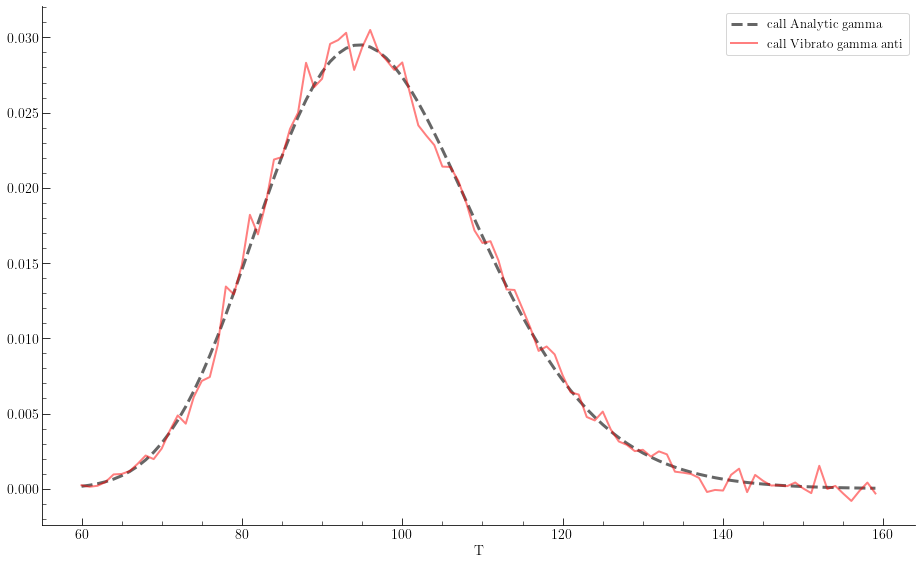

In [94]:
call_vanilla_gamma_analytic = pd.read_csv('datasets/call_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato = pd.read_csv('datasets/call_vibrato_gamma.csv', 
                                            header=None, names=['T', 'call Vibrato gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/call_vibrato_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
# call_vanilla_gamma_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_gamma_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

### Gamma vibrato AD

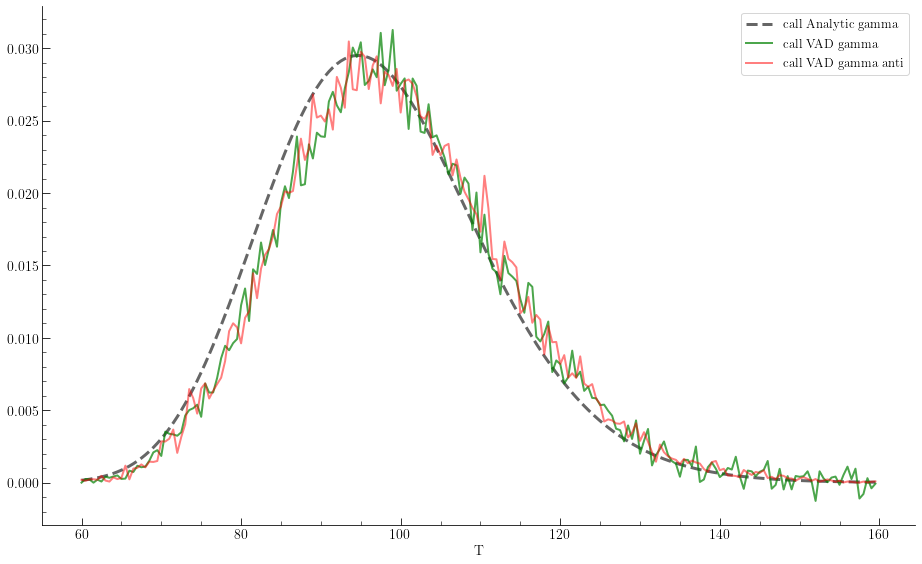

In [139]:
call_vanilla_gamma_analytic = pd.read_csv('datasets/call_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato = pd.read_csv('datasets/call_vibratoad_gamma.csv', 
                                            header=None, names=['T', 'call VAD gamma'], 
                                            sep=';', index_col=0)
call_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/call_vibratoad_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call VAD gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_gamma_vibrato.mul(100).plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_gamma_vibrato_anti.mul(100).plot(ax=ax, color='red', lw=2, alpha=.5);

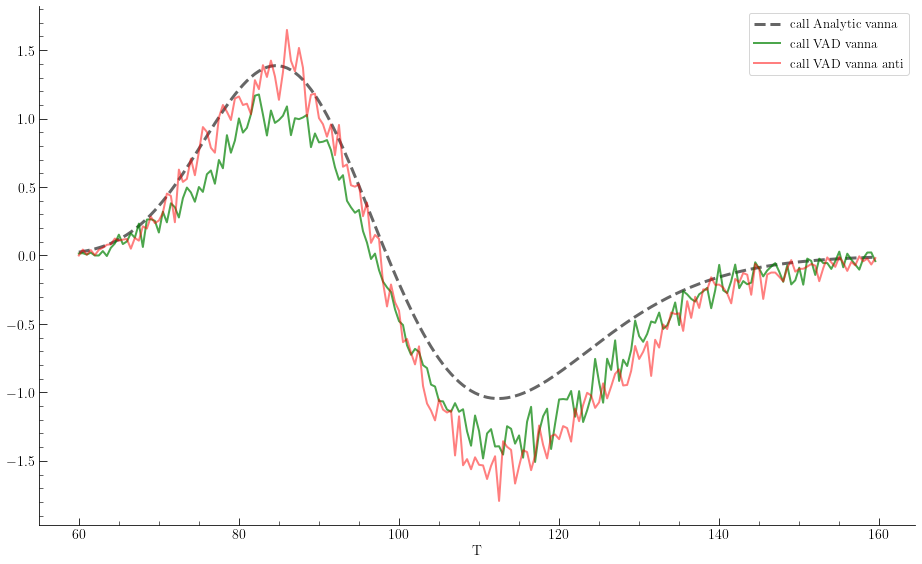

In [141]:
call_vanilla_vanna_analytic = pd.read_csv('datasets/call_analytic_vanna.csv', 
                                            header=None, names=['T', 'call Analytic vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato = pd.read_csv('datasets/call_vibratoad_vanna.csv', 
                                            header=None, names=['T', 'call VAD vanna'], 
                                            sep=';', index_col=0)
call_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/call_vibratoad_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call VAD vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_vanna_vibrato.mul(100).plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_vanna_vibrato_anti.mul(100).plot(ax=ax, color='red', lw=2, alpha=.5);

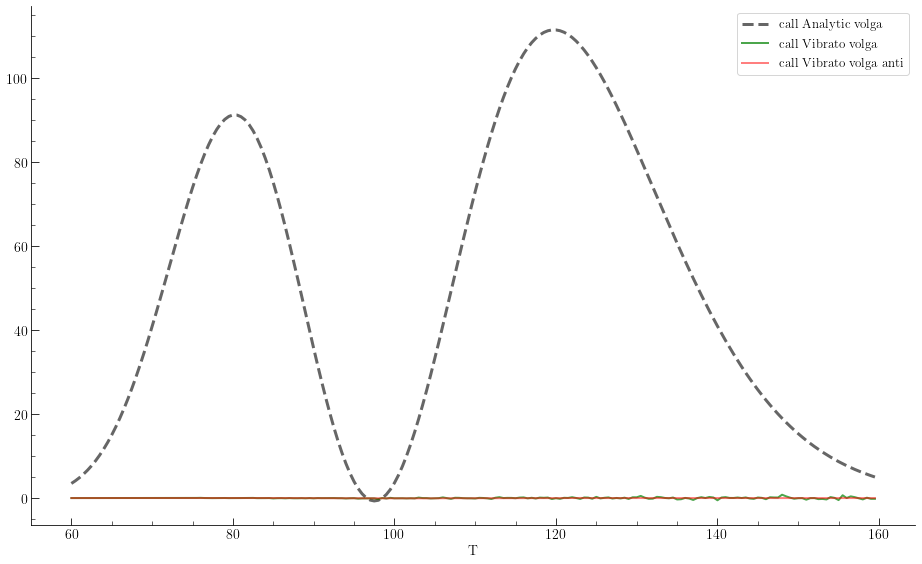

In [24]:
call_vanilla_volga_analytic = pd.read_csv('datasets/call_analytic_volga.csv', 
                                            header=None, names=['T', 'call Analytic volga'], 
                                            sep=';', index_col=0)
call_vanilla_volga_vibrato = pd.read_csv('datasets/call_vibratoad_volga.csv', 
                                            header=None, names=['T', 'call Vibrato volga'], 
                                            sep=';', index_col=0)
call_vanilla_volga_vibrato_anti = pd.read_csv('datasets/call_vibratoad_volga_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_vanilla_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
call_vanilla_volga_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_vanilla_volga_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

# Digital option BlackScholes:

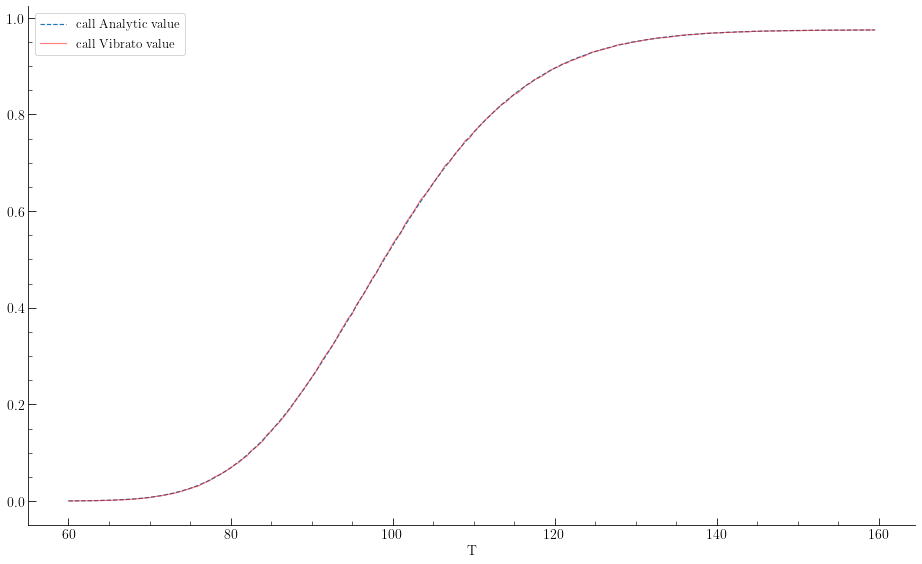

In [99]:
digicall_vanilla_premium_analytic = pd.read_csv('datasets/digicall_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
digicall_vanilla_premium_vibrato = pd.read_csv('datasets/digicall_vibrato_premium.csv', 
                                            header=None, names=['T', 'call Vibrato value'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
digicall_vanilla_premium_analytic.plot(ax=ax, ls='--');
digicall_vanilla_premium_vibrato.plot(ax=ax, color='red', alpha=.5);

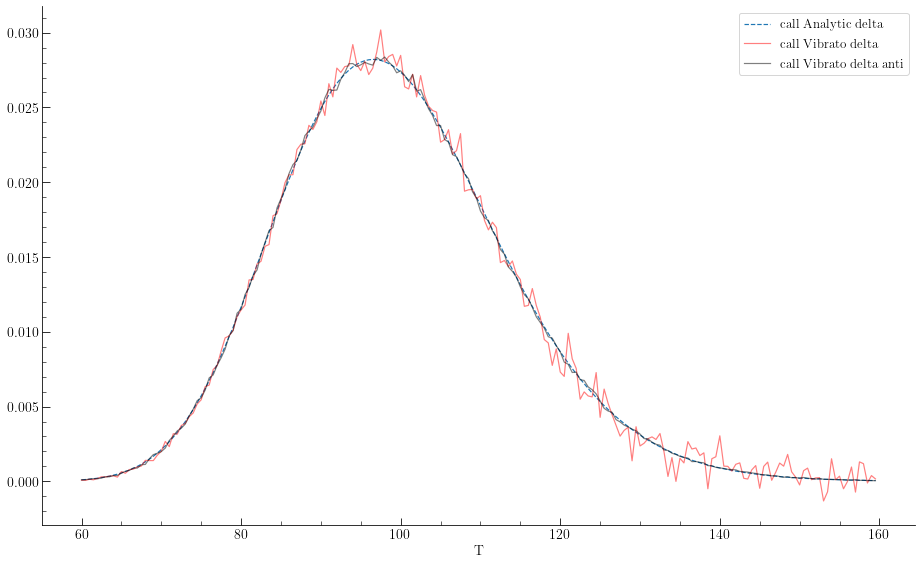

In [100]:
digicall_vanilla_delta_analytic = pd.read_csv('datasets/digicall_analytic_delta.csv', 
                                            header=None, names=['T', 'call Analytic delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato = pd.read_csv('datasets/digicall_vibrato_delta.csv', 
                                            header=None, names=['T', 'call Vibrato delta'], 
                                            sep=';', index_col=0)
digicall_vanilla_delta_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_delta_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato delta anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_delta_analytic.plot(ax=ax, ls='--');
digicall_vanilla_delta_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_delta_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

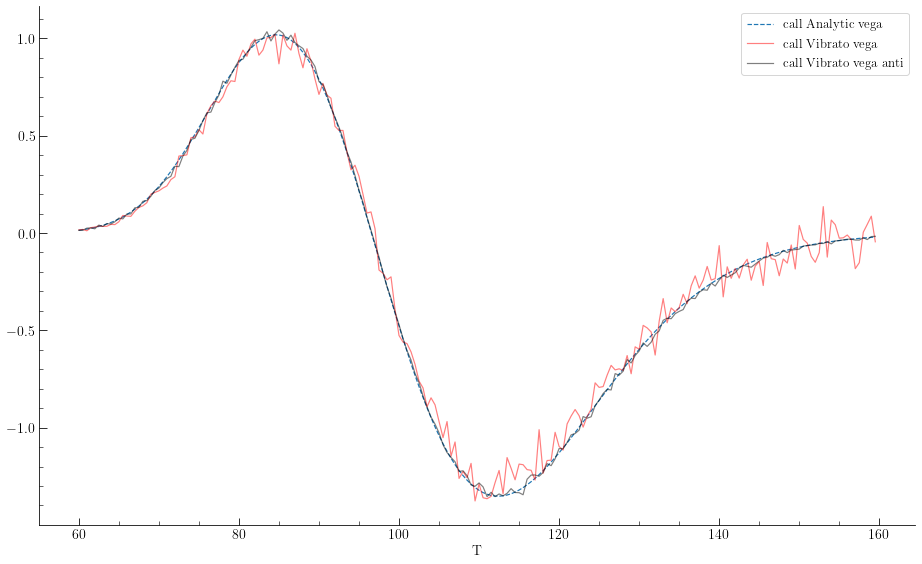

In [101]:
digicall_vanilla_vega_analytic = pd.read_csv('datasets/digicall_analytic_vega.csv', 
                                            header=None, names=['T', 'call Analytic vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato = pd.read_csv('datasets/digicall_vibrato_vega.csv', 
                                            header=None, names=['T', 'call Vibrato vega'], 
                                            sep=';', index_col=0)
digicall_vanilla_vega_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_vega_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato vega anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vega_analytic.plot(ax=ax, ls='--');
digicall_vanilla_vega_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_vega_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

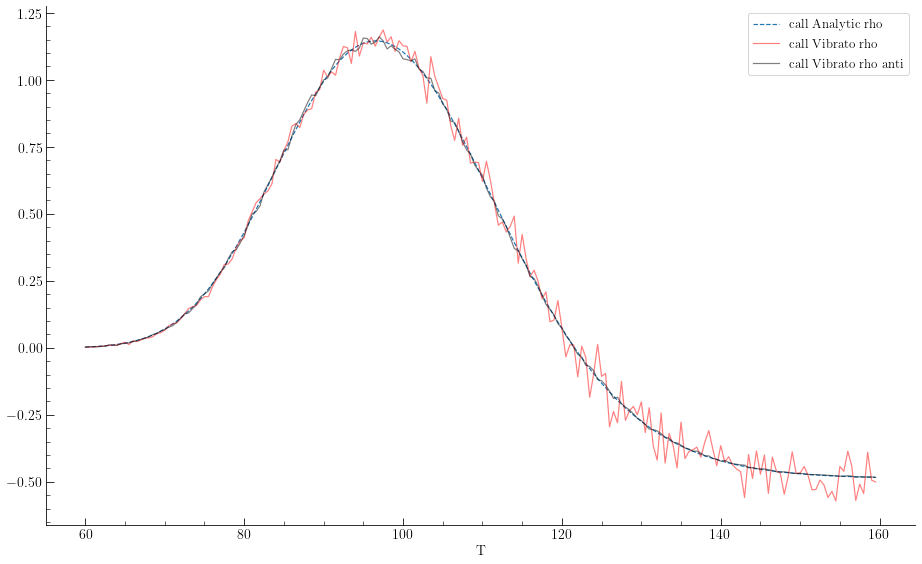

In [102]:
digicall_vanilla_rho_analytic = pd.read_csv('datasets/digicall_analytic_rho.csv', 
                                            header=None, names=['T', 'call Analytic rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato = pd.read_csv('datasets/digicall_vibrato_rho.csv', 
                                            header=None, names=['T', 'call Vibrato rho'], 
                                            sep=';', index_col=0)
digicall_vanilla_rho_vibrato_anti = pd.read_csv('datasets/digicall_vibrato_rho_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato rho anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_rho_analytic.plot(ax=ax, ls='--');
digicall_vanilla_rho_vibrato.plot(ax=ax, color='red', alpha=.5);
digicall_vanilla_rho_vibrato_anti.plot(ax=ax, color='black', alpha=.5);

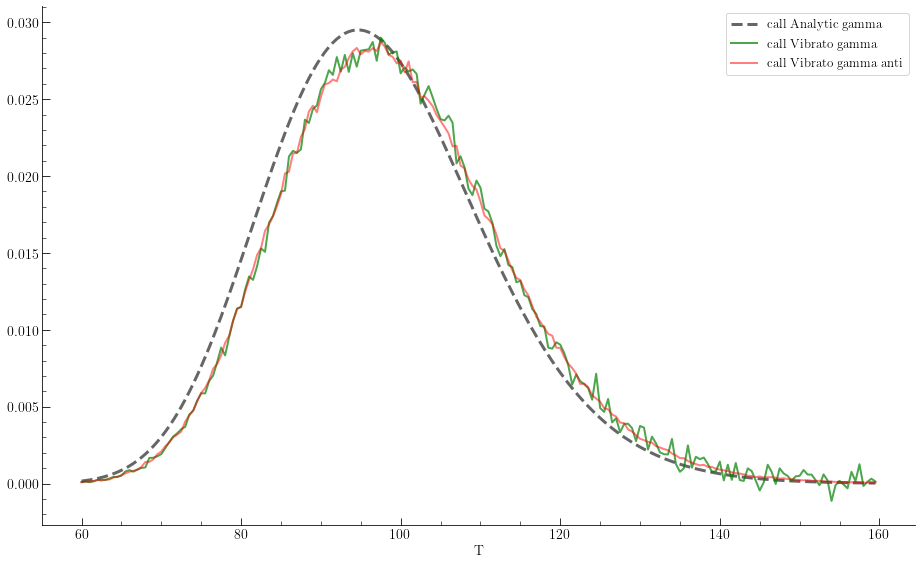

In [103]:
digicall_vanilla_gamma_analytic = pd.read_csv('datasets/digicall_analytic_gamma.csv', 
                                            header=None, names=['T', 'call Analytic gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato = pd.read_csv('datasets/digicall_vibratoad_gamma.csv', 
                                            header=None, names=['T', 'call Vibrato gamma'], 
                                            sep=';', index_col=0)
digicall_vanilla_gamma_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_gamma_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_gamma_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

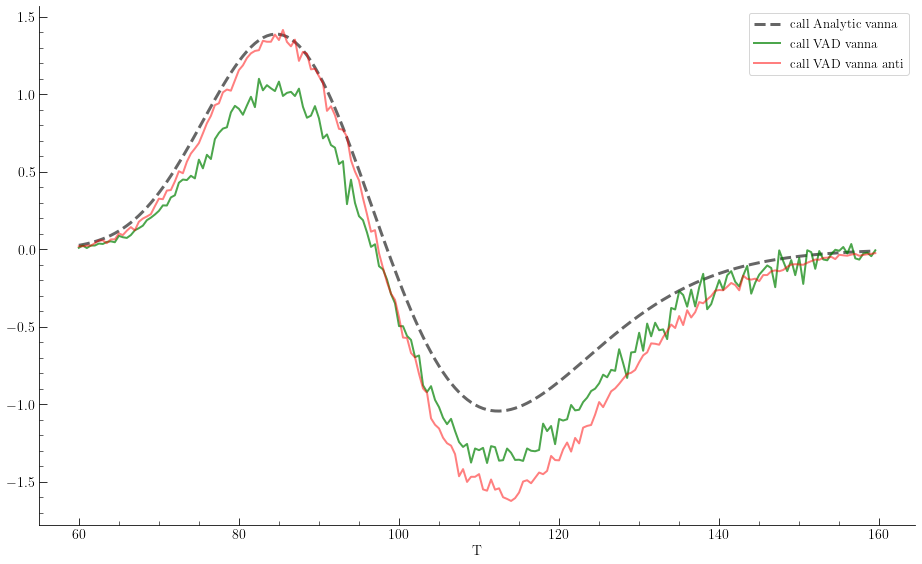

In [104]:
digicall_vanilla_vanna_analytic = pd.read_csv('datasets/digicall_analytic_vanna.csv', 
                                            header=None, names=['T', 'call Analytic vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato = pd.read_csv('datasets/digicall_vibratoad_vanna.csv', 
                                            header=None, names=['T', 'call VAD vanna'], 
                                            sep=';', index_col=0)
digicall_vanilla_vanna_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call VAD vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_vanna_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_vanna_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

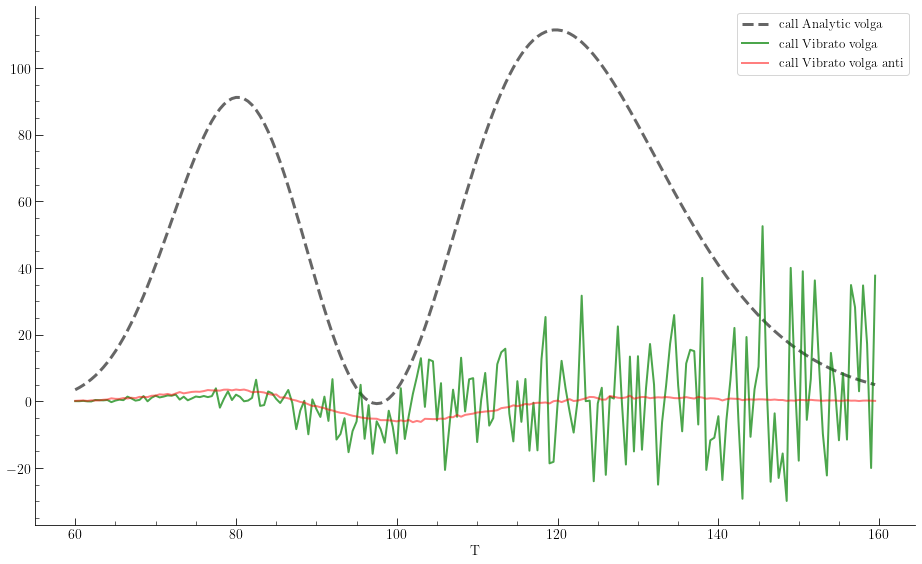

In [10]:
digicall_vanilla_volga_analytic = pd.read_csv('datasets/digicall_analytic_volga.csv', 
                                            header=None, names=['T', 'call Analytic volga'], 
                                            sep=';', index_col=0)
digicall_vanilla_volga_vibrato = pd.read_csv('datasets/digicall_vibratoad_volga.csv', 
                                            header=None, names=['T', 'call Vibrato volga'], 
                                            sep=';', index_col=0)
digicall_vanilla_volga_vibrato_anti = pd.read_csv('datasets/digicall_vibratoad_volga_antithetic.csv', 
                                            header=None, names=['T', 'call Vibrato volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
digicall_vanilla_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
digicall_vanilla_volga_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
digicall_vanilla_volga_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

## Vanilla Options Heston

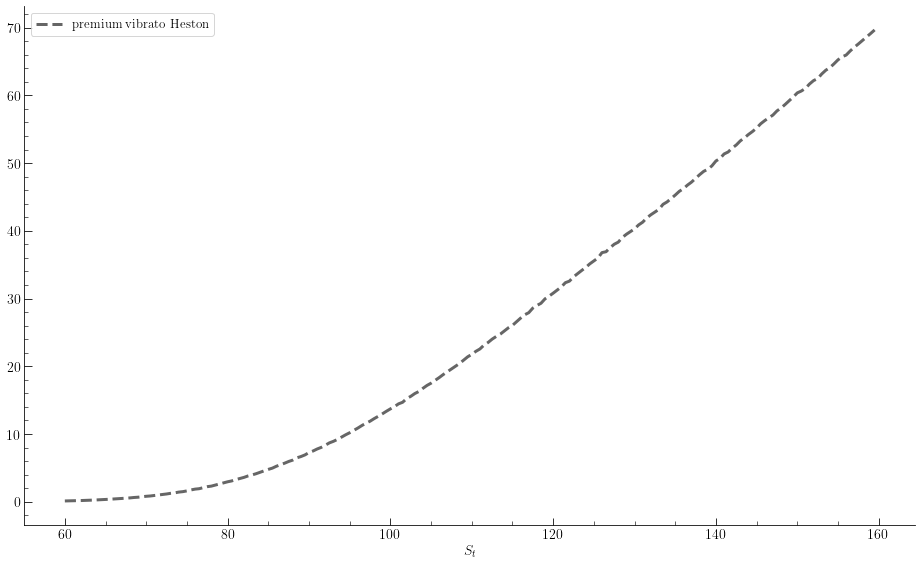

In [29]:
call_vanilla_premium_analytic = pd.read_csv('datasets/call_analytic_premium.csv', 
                                            header=None, names=['T', 'call Analytic value'], 
                                            sep=';', index_col=0)
call_heston_premium_vibrato = pd.read_csv('datasets/call_heston_vibrato_premium.csv', 
                                            header=None, names=['$S_t$', 'premium vibrato Heston'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
# call_vanilla_premium_analytic.plot(ax=ax) # Need calibration so that BS and Heston are aligned
call_heston_premium_vibrato.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);

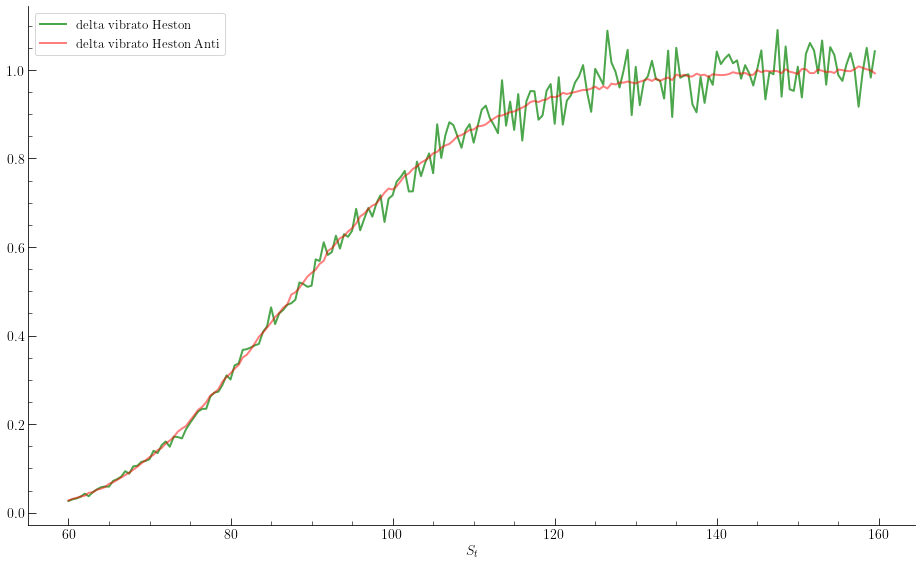

In [15]:
call_heston_delta_vibrato = pd.read_csv('datasets/call_heston_vibrato_delta.csv', 
                                            header=None, names=['$S_t$', 'delta vibrato Heston'], 
                                            sep=';', index_col=0);
call_heston_delta_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_delta_antithetic.csv', 
                                            header=None, names=['$S_t$', 'delta vibrato Heston Anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
call_heston_delta_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_delta_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

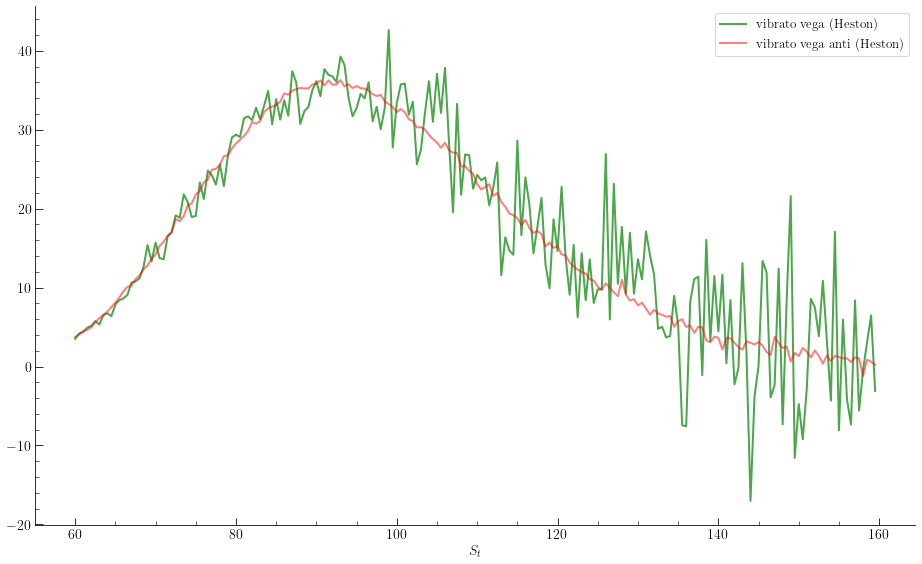

In [16]:
call_heston_vega_vibrato = pd.read_csv('datasets/call_heston_vibrato_vega.csv', 
                                            header=None, names=['$S_t$', 'vibrato vega (Heston)'], 
                                            sep=';', index_col=0)
call_heston_vega_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_vega_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vibrato vega anti (Heston)'], 
                                            sep=';', index_col=0)
fig, ax= plt.subplots();
call_heston_vega_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_vega_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

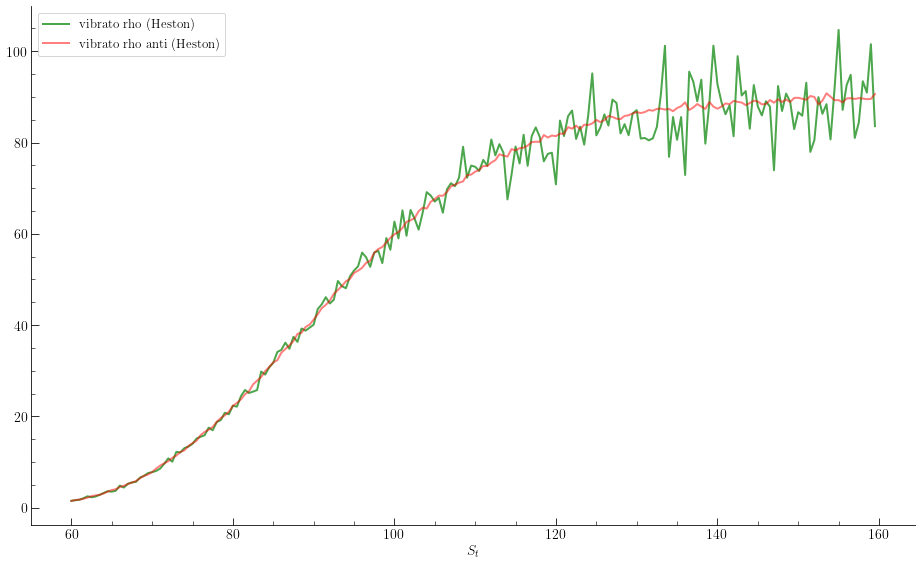

In [17]:
call_heston_rho_vibrato = pd.read_csv('datasets/call_heston_vibrato_rho.csv', 
                                            header=None, names=['$S_t$', 'vibrato rho (Heston)'], 
                                            sep=';', index_col=0)
call_heston_rho_vibrato_anti = pd.read_csv('datasets/call_heston_vibrato_rho_antithetic.csv', 
                                            header=None, names=['$S_t$', 'vibrato rho anti (Heston)'], 
                                            sep=';', index_col=0)

fig, ax= plt.subplots();
call_heston_rho_vibrato.plot(ax=ax, color='green', lw=2,alpha=.7);
call_heston_rho_vibrato_anti.plot(ax=ax, color='red', lw=2, alpha=.5);


### Heston automatic differentiation

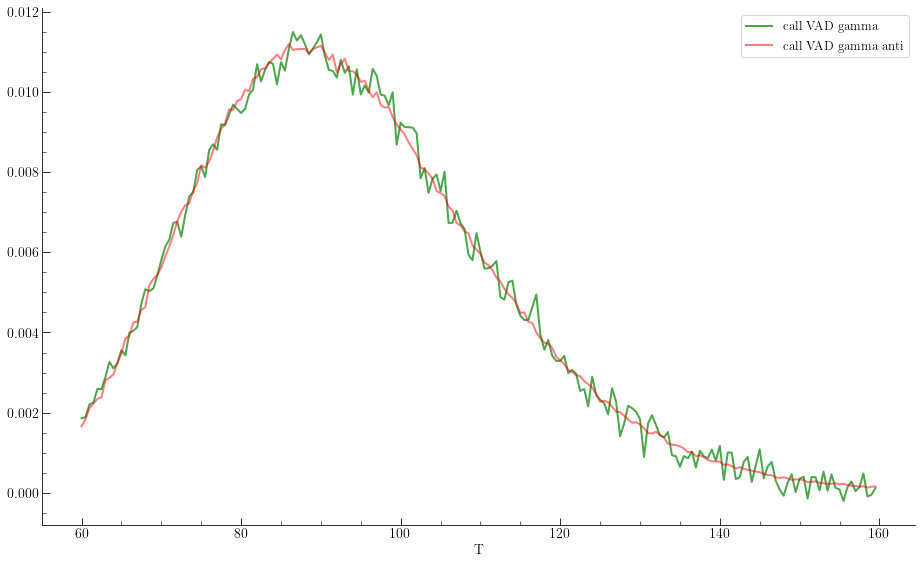

In [32]:
heston_gamma_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_gamma.csv', 
                                            header=None, names=['T', 'call VAD gamma'], 
                                            sep=';', index_col=0)
heston_gamma_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_gamma_antithetic.csv', 
                                            header=None, names=['T', 'call VAD gamma anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# heston_gamma_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_gamma_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_gamma_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

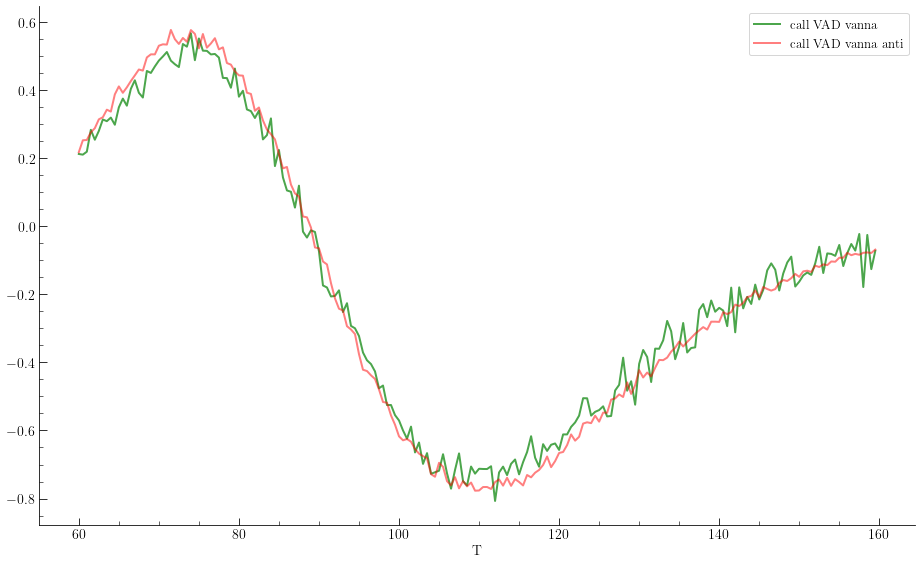

In [30]:
heston_vanna_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_vanna.csv', 
                                            header=None, names=['T', 'call VAD vanna'], 
                                            sep=';', index_col=0)
heston_vanna_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_vanna_antithetic.csv', 
                                            header=None, names=['T', 'call VAD vanna anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# heston_vanna_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_vanna_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_vanna_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

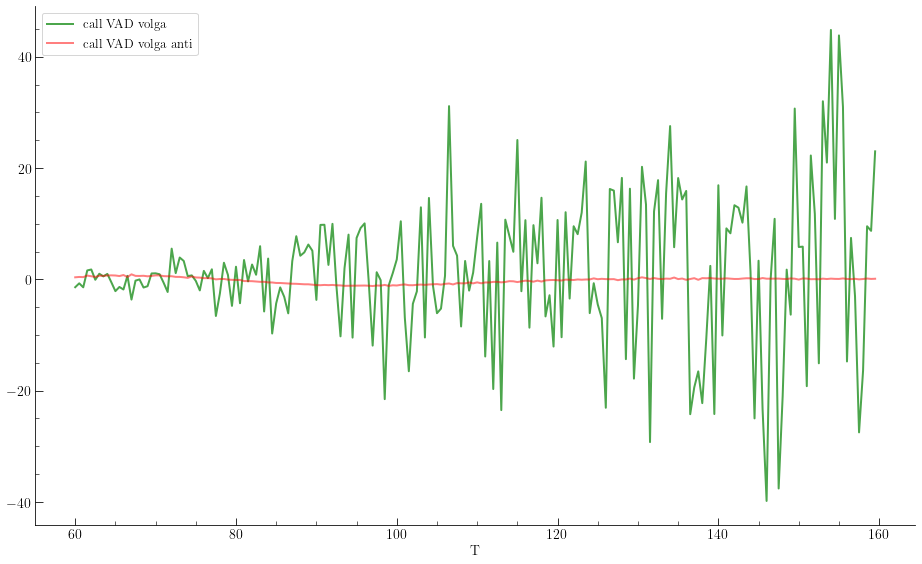

In [31]:
heston_volga_vibratoad = pd.read_csv('datasets/call_vibratoad_heston_volga.csv', 
                                            header=None, names=['T', 'call VAD volga'], 
                                            sep=';', index_col=0)
heston_volga_vibratoad_anti = pd.read_csv('datasets/call_vibratoad_heston_volga_antithetic.csv', 
                                            header=None, names=['T', 'call VAD volga anti'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
# heston_volga_analytic.plot(ax=ax, color='black', ls='--', lw=3, alpha=.6);
heston_volga_vibratoad.plot(ax=ax, color='green', lw=2,alpha=.7);
heston_volga_vibratoad_anti.plot(ax=ax, color='red', lw=2, alpha=.5);

## Performance plots

### Delta

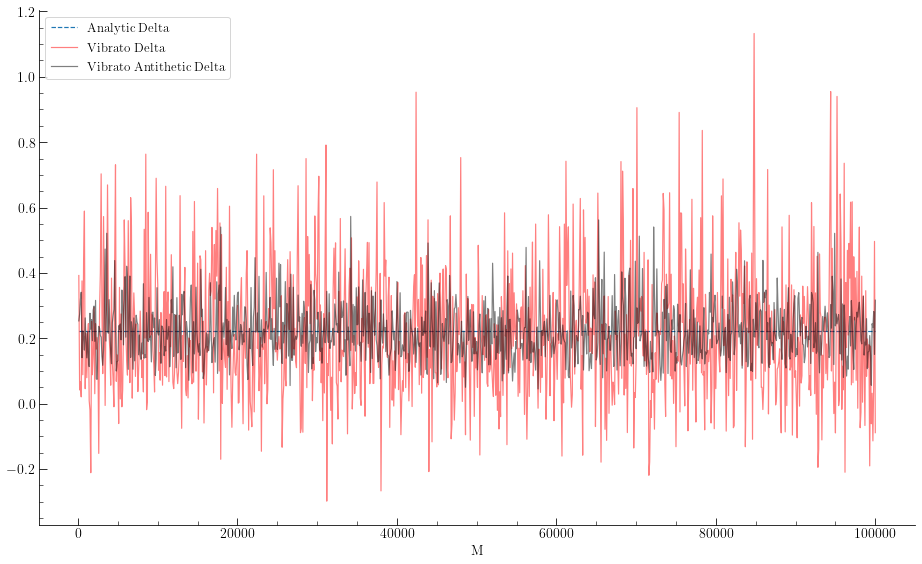

In [16]:
perf_delta_analytic = pd.read_csv('datasets/perf_delta_analytic.csv', 
                                            header=None, names=['M', 'Analytic Delta'], 
                                            sep=';', index_col=0)
perf_delta_vibrato = pd.read_csv('datasets/perf_delta_vibrato.csv', 
                                            header=None, names=['M', 'Vibrato Delta'], 
                                            sep=';', index_col=0)
perf_delta_vibrato_anti = pd.read_csv('datasets/perf_delta_vibrato_anti.csv', 
                                            header=None, names=['M', 'Vibrato Antithetic Delta'], 
                                            sep=';', index_col=0)


fig, ax= plt.subplots();
perf_delta_analytic.plot(ax=ax, ls='--');
perf_delta_vibrato.plot(ax=ax, color='red', alpha=.5);
perf_delta_vibrato_anti.plot(ax=ax, color='black', alpha=.5);